# Descriptive statistics

In this notebook, we will review some commonly used descriptive statistics and understand descripitive statistics.

This notebook is intended to support Chapter 3.1-3.2 of the textbook, and material is taken from the following script (from astroML):
* https://github.com/astroML/astroML-notebooks/blob/main/chapter3/astroml_chapter3_Overview_of_Probability_and_Random_Variables.ipynb
* https://github.com/astroML/astroML-notebooks/blob/main/chapter3/astroml_chapter3_Descriptive_Statistics.ipynb

##  Sample statistics are estimates of the descriptive statistics that come from data

The book presents these as integrals (with $\mu$ as the mean and $\sigma^2$ as the variance, here $\bar x$ and $s$ are used (respectively) as these are estimates from the data while the former represent the true distributions). This notation is introduced to highlight that these estimators can have a variance and a bias (e.g. the variance on the mean as one example). This is an invitation to watch for subtle effects and not be complacent. Vigilance is key in our field.

I am presenting these as sums for practical reasons. When dealing with data or simulations the probability distribution function $h(x)$ is accounted for in generating the samples. Therefore, from a practical standpoint these are what you will apply in your numerical calculations. For analytic calculations refer to the continuous versions presented in the book or other standard reference.


1. Arithmetic Mean
    $$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$
1. Variance
    $$
        s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
    $$
1. Standard Deviation
    $$
        s = \sqrt{ \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 }
    $$

1. Skewness
   $$
        \gamma_1 = \frac{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3 }{s^{3} }
    $$

1. Kurtosis
    $$
        \gamma_2 = \frac{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^4 }{s^{4} }
    $$

1. Absolute Deviation about $d$
    $$
        D(d) = \frac{1}{n} \sum_{i=1}^n |x_i - d|
    $$

1. Mode
    $$
        \text{Mode} = \underset{x}{\mathrm{arg\,max}} \; h(x)
    $$
    where $h(x)$ is the frequency of value $x$ (aka the histogram).

1. $P\%$ Quantile ($p$ is called the percentile), $q_p$
    $$
        \frac p {100}  =  \int_{-\infty}^{q_p} h(x) dx
    $$
    where $h(x)$ is the distribution function.

### Why do we care?

These metrics summarize the location (mean), width (variance and standard deviation), and shape of the distributions we are considering. Statistics is the process of understanding what the data are telling you. These measures help draw conclusions and probe the distribution of data to understand its origin.

The mode and quartiles are particularly helpful as they summarize the conclusions of your data and are less susceptible to tails and other non-Gaussian effects that are common in real data. Quartiles are directly related to confidence intervals, as we will discuss later. A related quantity, the interquartile range, is defined to be between $q_{25}$ and $q_{75}$.

### Error on the mean is different from thestandard deviation
As noted above, estimators from data have both bias and variance. One example of particular importance is the standard error of the mean, given by $$\sigma_{\bar x} = \frac s {\sqrt{N}}.$$  It is a common mistake to confuse this with the variance of the distribution or vice versa. Be mindful of this distinction.

### Properties of statistical estimators
Estimators provide etimates of the proprties of the underlying distribitons (sometiles called the 'truth').  It is useful to introdcue some properties that estimators can have. 
1. efficiency-- smallest variance of the estimate
1. consistancy-- estimate gets closer to the true value with more data
1. unbiasedness-- average estimates qual the true value
1. robustness-- does the estimator degrade with outliers or other effects in the data
1. sufficiency-- does the estimator caputre the relevent effects we care about?

All of these can be made to be mathmatically precise.   We will return to these often.

We will come back to these and compute some examples, but first we need to introduce a few simple distribtions.


## The Gaussian Distribtion (PDF)

The Gaussian (A.K.A. Normal) distribution is the most wellknown statistical distibtion.   It provides a good description of many experimental results.  It's PDF can be represnted as 
$$ \phi(x) =\frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2} \left(\frac{(x-\mu)}{\sigma}\right)^2 } $$ where $\mu$ is the mean, and $\sigma$ is the standard deviation.  We will define the mean and standard deviation below.


Python makes it easy to generate realizations of data from a wide variety of statical distribtions.  (see [Numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html))

## A realization of a gaussian noise
Lets start by generating a ralization of gaussian noise comparing it to the analytic form above. 

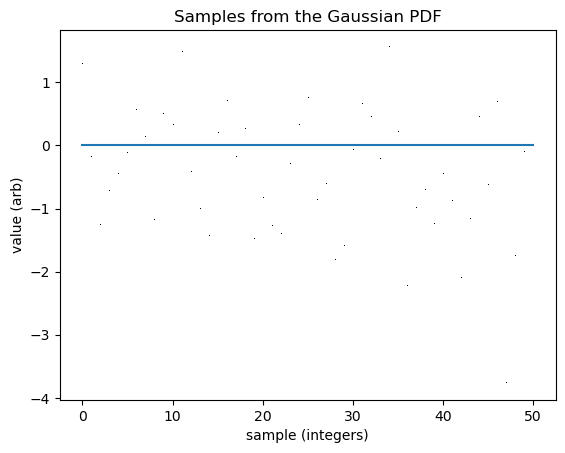

In [1]:
## import useful libraries
import numpy as np
import matplotlib.pyplot as plt

## generate a realization of N samples following a gaussian distribtion with zero mean and unit variance
N = 50
data = np.random.randn(N)

## plot this realization 
plt.plot(data,",k")
plt.title("Samples from the Gaussian PDF")
plt.xlabel("sample (integers)")
plt.ylabel("value (arb)")

## plot a line showing the mean
mean = 0
plt.plot(np.array([0,N]),np.array([1,1])* mean )

plt.show()

## Excercise
1. Overplot lines at +/- 1 sigma, and the +/- 2 sigma level
1. Increase the number of samples by a factor of 10, then 100, and then 1000 and see how this looks. 
1. If presented with guassian data, could you read the standard deviation off the plot?  Note: the variance and standard deviation of a gaussin are the same.

## Histograms and recovering distribtions from samples

If we have a realization of noise, we often want to determine its PDF.  We can do this by counting the number of samles in a given range and plotting the number as a fuciton of the central value for that range.  This is dedined as a histogram.  Python makes it easy to compute this.  We will now do this for our example above.

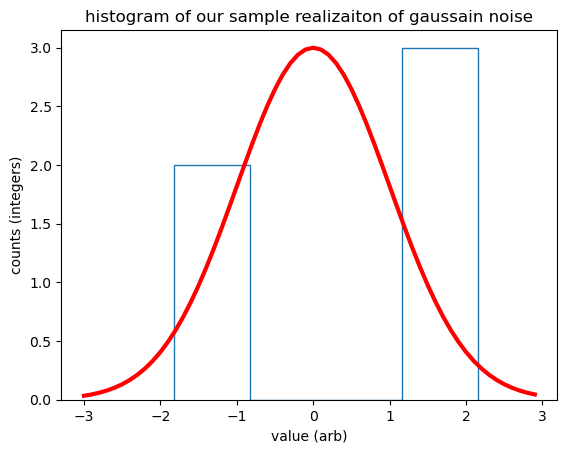

In [2]:
## regenerate a realizaiton of the random noise
N = 5
data = np.random.randn(N)

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")
plt.stairs(counts, bins)


#plt.hist(, bins='auto')

## overplot the analytic form of a gaussin, guess the ampltude 
A = np.max(counts)
sigma = 1
x = np.arange(-3,3,0.1)
Gaussian = A *np.exp(-0.5*(x/sigma)**2)
plt.plot(x,Gaussian,"r-",linewidth=3)
plt.title("histogram of our sample realizaiton of gaussain noise")
plt.ylabel("counts (integers)")
plt.xlabel("value (arb)")
plt.show()

## excercises
1. re-run this code multiple times to generate new realizations of the gaussina noise.  Note how in the limit of a small sample size (N=5 was the default) the agreement between the PDF is hard to estimate
1. increase the sample size by factors of 10.  At what sample size does the distribtion become unambigous?  What sample size is required to know the distibution to 1%?

## confidence intervals

If we normalze the area under the probability distribtion to 1 (e.g., $\int P(x) dx = 1$) then we can compute intervals which contain a given fraction of the probability.  Below we compute the fraction of the probabilty contained within the +/- 1 $\sigma$ interval for a gaussain PDF.

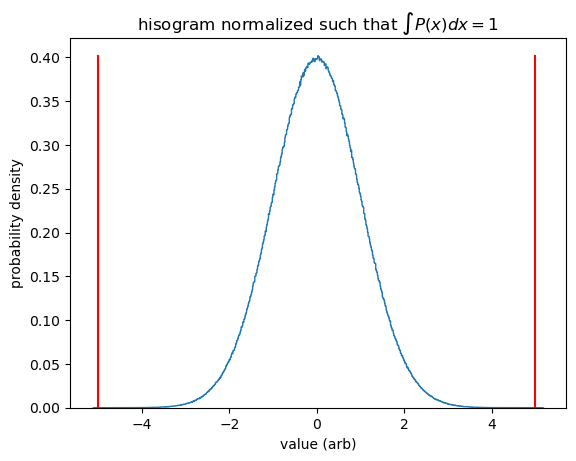

probability contained within +/-  5 of the mean is:  0.9999995
the probability outside the interval is:  4.999999999588667e-07


In [12]:
## regenerate a realizaiton of the random noise
N = 10000000
data = np.random.randn(N)

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")

## noramlize the hisogram
dx = bins[1] - bins[0] ## this is the width of the bins
counts = counts / np.sum(counts*dx)

## plot the normalized histogram
plt.stairs(counts, bins)
plt.title("hisogram normalized such that $\int P(x) dx = 1$")
plt.ylabel("probability density")
plt.xlabel("value (arb)")

## draw vertical linse at the +/- n_sigma, note this is normalized to have unit variance

n_sigma = 5  ## <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<. CHANGE THIS!!!
plt.plot(np.array([1,1])*n_sigma*-1,np.array([0,1])*np.max(counts),"r")
plt.plot(np.array([1,1])*n_sigma,np.array([0,1])*np.max(counts),"r")

## compute the area contained widhtin these limits

## this line figures out which data is in the interval
in_interval = np.where(np.logical_and(bins > -n_sigma,bins <n_sigma))
## this computes the integral over that range
integrated_probability = np.sum(counts[in_interval]*dx)

plt.show()

print("probability contained within +/- ",n_sigma,
      "of the mean is: ",integrated_probability)
print("the probability outside the interval is: ", 1-integrated_probability
     )


## Excercise

1. Fill out this table giving the probability contaned within 1,2,3,4, and 5 sigma interales as well as the probability outside these intervals
|$\pm sigma$  | P(inside) | P(outside)| 
| --- | --- | --- |
|$\pm 1 \sigma$| XX | XX |
|$\pm 2 \sigma$| XX | XX |
|$\pm 3 \sigma$| XX | XX |
|$\pm 4 \sigma$| XX | XX |
|$\pm 5 \sigma$| XX | XX | 
1. Are all of these estimtes believable?  Explain.

Note-- obviously you can do this analyticaly, but this is super easy and it tells you both what people mean when they talk about confidence intervals, and how to generalize this to other distribtions.  For gaussain distribtions the confidence intervals are related to the variance, for other distribtions the relatinship may be more complciated.   This shows how (for gaussian PDFs) the confidence intervals are realted to probability.  For refernce $5 \sigma$ should be about 1 in a million.

## Other sample statistics

Lets play with some of the other sample statistics.   Note-- skewnes and kertosis vanish for a gaussian so we need to generate a more intersring distritbiotn first.  How could such a thing arise?

### example conversion of a flux distrition to a magnitude distribtion

Generate a gaussian distribtion for flux (f) with 20\% standerd deviation about some mean following a gaussian distribution.   Convert this to mangitude using $M = -2.5 \log_{10}f$.  Make a plot of this distrition.

Text(0.5, 0, 'value (arb)')

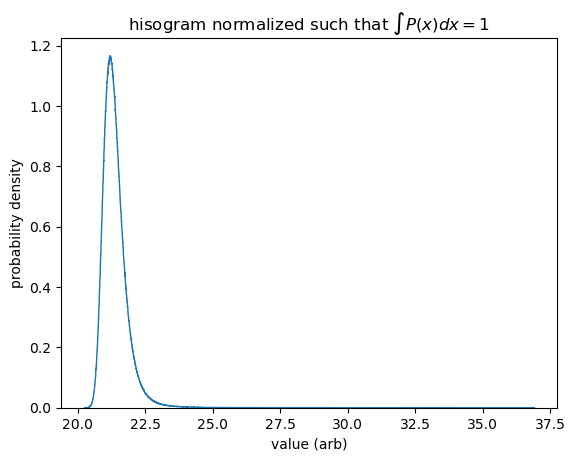

In [4]:
## your code should go here.

## regenerate a realizaiton of the random noise
N = 10000000
data = np.random.randn(N)
data = np.abs(data + 3)/1000000000
data = -2.5*np.log10(data)

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")

## noramlize the hisogram
dx = bins[1] - bins[0] ## this is the width of the bins
counts = counts / np.sum(counts*dx)

## plot the normalized histogram
plt.stairs(counts, bins)
plt.title("hisogram normalized such that $\int P(x) dx = 1$")
plt.ylabel("probability density")
plt.xlabel("value (arb)")

In [5]:
import scipy

# First let's just look at a bunch of in-built functions in scipy and numpy

x = data

q25, q50, q75 = np.percentile(x, [25, 50, 75])
mean = np.mean(x)
mode = scipy.stats.mode(x)
median = np.median(x) 
variance = np.var(x) 
standard_deviation = np.std(x)
skew = scipy.stats.skew(x)
kurtosis = scipy.stats.kurtosis(x)

print('25%, 50%, 70% quartiles:', q25, q50, q75)
print('mean:', mean)
print('mode:', mode)
print('median:', median)
print('variance:', variance)
print('standard deviation:', standard_deviation)
print('skew:', skew)
print('kurtosis:', kurtosis)

25%, 50%, 70% quartiles: 21.087018665435327 21.307198537941403 21.583482850567357
mean: 21.384372034215538
mode: ModeResult(mode=np.float64(21.35927836164916), count=np.int64(2))
median: 21.307198537941403
variance: 0.2145495300667123
standard deviation: 0.463194915847219
skew: 2.539695310560795
kurtosis: 18.31255474384854


## Excercises
1. make a histogram and add the mean, mode, median, and quartiles to the plot
1. make the relative flux errors tiy 0.1% to make this a gussian, observe how the skemewss and kertossis change
1. make the relative flx errors huge (50%) see how the sample statistics change, especially the differences between mean, meadian, and mode.  

## cautionary tale-- make sure you account for the degrees of fredom when computing estiamtes for the standard deviation in the case of low sample sizes

uncorrected: 0.71656953363587
corrected: 0.8776148613159945


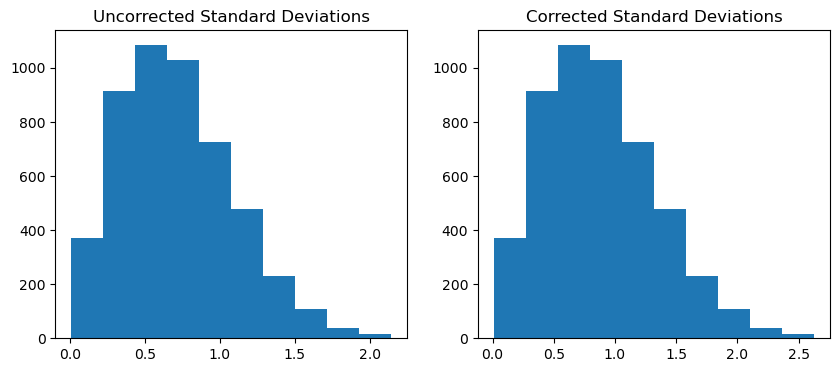

In [6]:
uncorrected = []
corrected = []
for x in range(1,5000):
    samples = np.random.normal(loc=5.0, scale=1.0, size = 3) #small sample size, try 10
    uncorrected.append(np.std(samples, ddof=0))
    corrected.append(np.std(samples, ddof=1))

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)   
ax[0].hist(uncorrected)
ax[1].hist(corrected)
ax[0].set_title("Uncorrected Standard Deviations")
ax[1].set_title("Corrected Standard Deviations")

print('uncorrected:', np.mean(uncorrected))
print('corrected:', np.mean(corrected))

## Robust descriptive statistics

Medians and the width estimator $\sigma_{G}=0.7413(q_{75}-q_{25})$ is a useful estimator when outliers exist.

In [7]:
from astroML import stats

np.random.seed(0)
x = np.random.normal(size=1000) # 1000 normally distributed points 
stats.sigmaG(x)

np.float64(0.9676727191694041)

In [8]:
from scipy.stats import cauchy
  
normal = np.random.normal(loc=8.0, scale=1.0, size=100) # 100 samples from a Gaussian

a = np.random.normal(loc=8.0, scale=1.0, size=95) # 95 samples from a Gaussian
b = cauchy.rvs(loc=8.0, scale=20, size=5) # 5 samples from a Cauchy
normal_with_outliers = np.concatenate([a, b]) # combine to create Gaussian with outliers

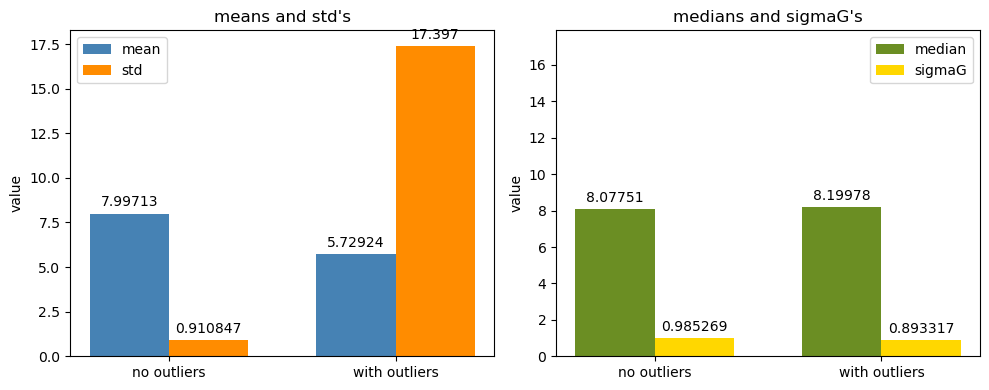

In [9]:
labels = ['no outliers', 'with outliers']
means = [np.mean(normal),np.mean(normal_with_outliers)]
standard_deviations = [np.std(normal),np.std(normal_with_outliers)]
medians = [np.median(normal), np.median(normal_with_outliers)]
sigmaG = [stats.sigmaG(normal), stats.sigmaG(normal_with_outliers)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)   
rects1 = ax[0].bar(x - width/2, means, width, label='mean', color = 'steelblue')
rects2 = ax[0].bar(x + width/2, standard_deviations, width, label='std', color = 'darkorange')
rects3 = ax[1].bar(x - width/2, medians, width, label='median', color = 'olivedrab')
rects4 = ax[1].bar(x + width/2, sigmaG, width, label='sigmaG', color = 'gold')

titles = ["means and std's","medians and sigmaG's"]
rected = [(1,2),(3,4)]
for i in [0,1]:
    ax[i].set_ylabel('value')
    ax[i].set_xticks(x);
    ax[i].set_xticklabels(labels)
    ax[i].legend()
    ax[i].set_title(titles[i])

combined = means + standard_deviations + medians + sigmaG
ax[1].set_ylim([0, np.max(combined)+0.5])

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)
ax[1].bar_label(rects3, padding=3)
ax[1].bar_label(rects4, padding=3)
fig.tight_layout()